In [1]:
import os
import sys
from ordplan import ORD
from ga import GA 
from lp import LP

In [2]:
#roll_paper = [68, 73, 75, 79, 82, 85, 88, 91, 95, 97]
orders = ORD("data/true_ordplan.csv",deadline_scope=0).get(deadline=False)
orders

,เลขที่ใบสั่งขาย,กำหนดส่ง,แผ่นหน้า,ลอน C,แผ่นกลาง,ลอน B,แผ่นหลัง,จำนวนชั้น,ตัดกว้าง,ตัดยาว,จำนวนสั่งขาย,ประเภททับเส้น
0,x25769,5/1/2023,CM127,CM127,CM127,CM127,CM127,5,11.6142,44.0945,1200,Y
1,x25429,5/1/2023,KB120,CM127,CM127,CM127,KB120,5,20.8268,51.1024,2820,N
2,x25436,5/1/2023,KB160,0,0,CM127,KB120,3,22.2441,50.0394,8860,X
3,x25437,5/1/2023,KB160,0,0,CM127,KB160,3,29.2913,51.2992,4290,X
4,x25777,5/1/2023,KB160,CM127,CM127,CM127,KB160,5,4.9213,54.7244,5600,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
14152,x39707,9/23/2023,KS231,CM197,0,0,KB230,3,23.7402,72.0472,2000,N
14153,x39708,9/23/2023,KS231,CM197,0,0,KB230,3,23.7402,72.0472,1000,N
14154,x39706,9/23/2023,KS231,CM197,0,0,KB230,3,30.1181,63.7795,1200,N
14155,x39819,9/25/2023,KS161,CM147,0,0,KB120,3,23.3465,51.9291,1450,N


In [3]:
tuning_value =3 
for i,width in enumerate(orders['ตัดกว้าง']):
    roll = ORD.calculate_roll_tuning(width,tuning_value)
    if(roll):
        print(roll,width)
        break 

68 22.2441


In [7]:
ga_instance = GA(orders,roll,tuning_value,num_generations=15).get()
ga_instance.run()

c:\Users\opo25\anaconda3\envs\ortools\Lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


Generation :  1
Solution :
      cut_width  out
0       18.7795    2
1       18.7795    2
2       18.7795    1
3       18.7795    1
4       18.7795    2
...         ...  ...
2250    26.4173    2
2251    26.4173    1
2252    26.4173    1
2253    26.4173    1
2254    26.4961    1

[2255 rows x 2 columns]
Roll : 68
Used : -65121.159499999994
Waste : 65189.159499999994


Generation :  2
Solution :
      cut_width  out
0       18.7795    1
1       18.7795    1
2       18.7795    1
3       18.7795    1
4       18.7795    2
...         ...  ...
1471    26.4173    1
1472    26.4173    1
1473    26.4173    1
1474    26.4173    2
1475    26.4173    1

[1476 rows x 2 columns]
Roll : 68
Used : -40461.9054
Waste : 40529.9054


Generation :  3
Solution :
     cut_width  out
0      18.7795    1
1      18.7795    1
2      18.7795    1
3      18.7795    2
4      18.7795    2
..         ...  ...
921    26.4173    1
922    26.4173    1
923    26.4173    1
924    26.4173    2
925    26.4173    1

[926 row

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


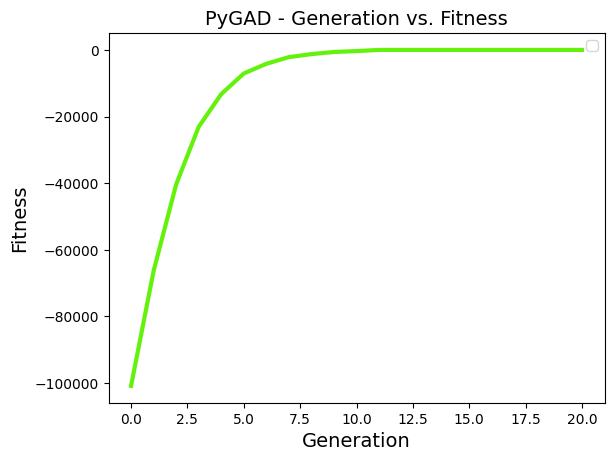

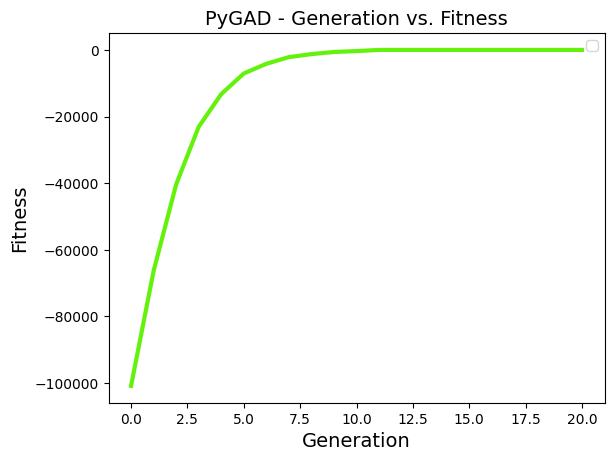

In [8]:
ga_instance.plot_fitness()

In [6]:
lp_instance = LP(orders,roll,tuning_value).run()

Solution :
   cut_width  out
0    20.5906  2.0
1    25.5906  1.0
Roll : 68
Used : 66.7718
Waste : 1.2282


